# Analyzing Milwaukee Police Call Data and Weather Data
### Grant Fass and Chris Hubbell

## Introduction
Across the world, there are many crimes commited every hour. One of the greatest challenges is reducing crime and maintaining safety for citizens. Part of preventing crime relies on the reporting of it by citizens. If nobody informs the police, the police are unable to act. This is why reporting crimes and incidents is so important, especially when people's lives are in danger. In Wisconsin, Milwaukee Police Department (MPD) releases data regarding all of their dispatch calls, which we have been able to get since 2016. This allows for analyzing trends of crime reporting over time as well as as it relates to other factors. In 2010, Milwaukee installed a new system for detecting gun shots called ShotSpotter, which was expanded into more neighborhoods in 2014. This system is capable of detecting when a shot is fired and where it was to a high degree of accuracy. The data consists of both ShotSpotter calls as well as Shots Fired calls. The key difference is that Shots Fired are calls from people and ShotSpotter are automatic.

## Research Questions:
- Is there a significant difference between the distribution of shots spotted over time and calls for shots fired?
- Is there a significant difference in the proportion of calls that were unable to be located for shots fired calls compared to shots spotted?
- Does the number of shots spotted and fired correlate with certain dates including holidays and events?
- Does the number of calls correlate with certain weather conditions?
- Is it possible to predict number of calls based on location and district?
- Is it possible to predict the nature of a call based on its location and district?

## Hypotheses:
- There are significantly more shots spotted than calls about shots fired.
- Significantly more shots fired calls are unable to be located than shots spotted.
- There will be significantly more shots spotted calls on July 4th, Dec. 31st, and Jan 1st than normal days.
- There will be significantly less shots fired calls on holidays than normal days.
- There are significantly more calls on days with clear weather than inclement weather.
- There are significantly more calls on days around 75 degrees than there are on days around 95 or 55 degrees.
- The number of calls will be able to be predicted based on location and district.
- The type of call will be unable to be predicted based on location and district.

# Imports
These are the libraries that will be relvant for working with the dataset.

In [29]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import Image
from scipy.stats import kstest
from scipy.stats import ks_2samp
sns.set()

# Loading the Data
This section is used to load the data and make sure that all of the features have been formatted using the correct types. This data is ready for use since it has already been cleaned in another notebook. The MPDDataCleaning notebook was used to clean the MPD (Milwaukee Police Department) dataset. The WeatherDataCleaning notebook was used to clean the weather dataset. These two datasets were then combined in the DatasetCombining notebook.

In [2]:
df = pd.read_csv('merged_data.csv')

C:\Users\fassg\AppData\Local\Temp/ipykernel_135120/1011756362.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('merged_data.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4027695 entries, 0 to 4027694
Data columns (total 30 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   district               object 
 1   nature                 object 
 2   status                 object 
 3   call_id                int64  
 4   datetime               object 
 5   traffic_crime          bool   
 6   weapon_crime           bool   
 7   isCorner               bool   
 8   houseNumber            float64
 9   primaryStreetName      object 
 10  primaryStreetSuffix    object 
 11  secondaryStreetName    object 
 12  secondaryStreetSuffix  object 
 13  loc_id                 int64  
 14  isdaytime              bool   
 15  tempC                  int64  
 16  windspeedKmph          int64  
 17  winddirdegree          int64  
 18  weatherDesc            object 
 19  precipMM               float64
 20  humidity               int64  
 21  visibilityKm           int64  
 22  pressureMB        

## Revising Feature Types
Calling the [`.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) command shows that there are a number of features that are improperly formatted. The district, nature, status, primaryStreetName, primaryStreetSuffix, secondaryStreetName, secondaryStreetSuffix, and weatherDesc all need to become categorical features. The datetime feature needs to be changed to datetime.

In [4]:
df['district'] = df['district'].astype('category')
df['nature'] = df['nature'].astype('category')
df['status'] = df['status'].astype('category')
df['primaryStreetName'] = df['primaryStreetName'].astype('category')
df['primaryStreetSuffix'] = df['primaryStreetSuffix'].astype('category')
df['secondaryStreetName'] = df['secondaryStreetName'].astype('category')
df['secondaryStreetSuffix'] = df['secondaryStreetSuffix'].astype('category')
df['weatherDesc'] = df['weatherDesc'].astype('category')
df['datetime'] = pd.to_datetime(df['datetime'], infer_datetime_format=True)

## Examining The Loaded Data
The data should now be in the proper types. This will be examined using the [`.head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html), [`.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html), and [`.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) methods.

In [5]:
df.head(5).T

,0,1,2,3,4
district,NaN,NaN,NaN,NaN,NaN
nature,FOLLOW UP,PROPERTY DAMAGE,VACANT HOUSE CHK,FOLLOW UP,TRAFFIC STOP
status,Assignment Completed,Advised/Referral,Assignment Completed,Assignment Completed,Advised
call_id,163120850,163120774,163120851,163120853,163120857
datetime,2016-11-07 09:33:52,2016-11-07 09:33:55,2016-11-07 09:34:58,2016-11-07 09:36:20,2016-11-07 09:38:10
traffic_crime,False,False,False,False,True
weapon_crime,False,False,False,False,False
isCorner,False,False,False,False,False
houseNumber,2920.0,5929.0,3425.0,245.0,765.0
primaryStreetName,N 4TH,W BLUE MOUND,N 93RD,W LINCOLN,N 25TH


In [6]:
df.tail(5).T

,4027690,4027691,4027692,4027693,4027694
district,3,6,1,4,3
nature,TRAFFIC LASER,TRAFFIC STOP,BATTERY,ACC PI,PROBATION/PAROLE
status,Service in Progress,Advised,To be Filed,Service in Progress,Assignment Completed
call_id,220101027,220101028,220101031,220101034,220101039
datetime,2022-01-10 15:28:31,2022-01-10 15:29:07,2022-01-10 15:32:26,2022-01-10 15:34:19,2022-01-10 15:34:59
traffic_crime,False,True,False,False,False
weapon_crime,False,False,False,False,False
isCorner,False,False,False,False,False
houseNumber,2700.0,3136.0,522.0,5100.0,2630.0
primaryStreetName,W VLIET,S 43RD,N WATER,N LOVERS LANE,N 49TH


In [7]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4027695 entries, 0 to 4027694
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   district               3937463 non-null  category      
 1   nature                 4027695 non-null  category      
 2   status                 4027695 non-null  category      
 3   call_id                4027695 non-null  int64         
 4   datetime               4027695 non-null  datetime64[ns]
 5   traffic_crime          4027695 non-null  bool          
 6   weapon_crime           4027695 non-null  bool          
 7   isCorner               4027695 non-null  bool          
 8   houseNumber            3426083 non-null  float64       
 9   primaryStreetName      4016778 non-null  category      
 10  primaryStreetSuffix    3844881 non-null  category      
 11  secondaryStreetName    549421 non-null   category      
 12  secondaryStreetSuffix  53185

In [8]:
df.describe()

,call_id,houseNumber,loc_id,tempC,windspeedKmph,winddirdegree,precipMM,humidity,visibilityKm,pressureMB,cloudcover,HeatIndexC,DewPointC,WindChillC,WindGustKmph,FeelsLikeC,uvIndex
count,4.027695e+06,3.426083e+06,4027695.0,4.027695e+06,4.027695e+06,4.027695e+06,4.027695e+06,4.027695e+06,4.027695e+06,4.027695e+06,4.027695e+06,4.027695e+06,4.027695e+06,4.027695e+06,4.027695e+06,4.027695e+06,4.027695e+06
mean,1.891808e+08,3.367593e+03,1.0,9.332960e+00,1.396831e+01,1.978097e+02,8.068526e-02,7.252384e+01,9.280653e+00,1.016711e+03,4.627480e+01,9.741805e+00,4.295812e+00,7.040703e+00,2.030895e+01,7.329460e+00,2.161411e+00
std,1.459309e+07,2.415387e+03,0.0,1.099667e+01,6.506821e+00,9.301290e+01,3.459743e-01,1.560838e+01,1.861185e+00,7.728984e+00,3.620323e+01,1.150243e+01,1.050146e+01,1.314242e+01,9.506874e+00,1.356433e+01,1.869588e+00
min,1.630815e+08,1.000000e+00,1.0,-3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,9.860000e+02,0.000000e+00,-3.000000e+01,-3.400000e+01,-4.400000e+01,0.000000e+00,-4.400000e+01,1.000000e+00
25%,1.732129e+08,1.614000e+03,1.0,1.000000e+00,9.000000e+00,1.260000e+02,0.000000e+00,6.100000e+01,1.000000e+01,1.012000e+03,1.100000e+01,1.000000e+00,-4.000000e+00,-3.000000e+00,1.300000e+01,-3.000000e+00,1.000000e+00
50%,1.906707e+08,2.920000e+03,1.0,9.000000e+00,1.300000e+01,2.140000e+02,0.000000e+00,7.400000e+01,1.000000e+01,1.016000e+03,3.900000e+01,9.000000e+00,4.000000e+00,6.000000e+00,1.900000e+01,6.000000e+00,1.000000e+00
75%,2.016115e+08,4.600000e+03,1.0,1.900000e+01,1.800000e+01,2.760000e+02,0.000000e+00,8.500000e+01,1.000000e+01,1.021000e+03,8.300000e+01,1.900000e+01,1.400000e+01,1.900000e+01,2.600000e+01,1.900000e+01,3.000000e+00
max,2.201010e+08,6.460500e+05,1.0,3.500000e+01,4.700000e+01,3.600000e+02,1.630000e+01,1.000000e+02,1.000000e+01,1.048000e+03,1.000000e+02,4.100000e+01,2.700000e+01,3.500000e+01,7.100000e+01,4.100000e+01,9.000000e+00


# TODO: Explain



# TODO GRAPHS
- Date vs number/calls line graph
- Box plot of district/num calls
- heatmap call type/status? Is this too big?
- district/nature
- time/nature
- time/status
- calls that are 'in service' and 'resolved' , are they related? compare by time? would ID's match?

# Graphs
This section looks to explore the data by generating graphs. Extra features for year, month of the year, week of the year, day of the month, and hour of the day will be generated to help with graphs. This will allow for the exploration of different granularity levels. Some of the graphs use help from [this](https://www.statology.org/seaborn-legend-outside/) for moving the legend outside of the graph, and from [this](https://stackoverflow.com/a/60679315) for plotting multiple categories (fix legend not showing).

In [9]:
df['year'] = df['datetime'].map(lambda t: t.year)
df['month'] = df['datetime'].map(lambda t: t.month)
df['week'] = df['datetime'].map(lambda t: t.week)
df['day'] = df['datetime'].map(lambda t: t.day)
df['hour'] = df['datetime'].map(lambda t: t.hour)

Text(0.5, 1.0, 'All Calls Over Time')

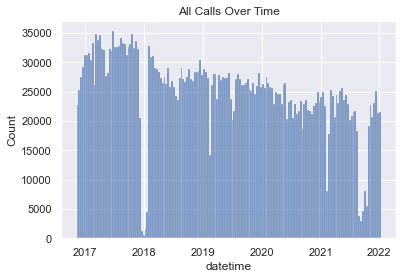

In [10]:
ax = sns.histplot(data=df, x='datetime')
ax.set_title('All Calls Over Time')

This graph shows all of the call types over time. What is interesting is that there appears to be a big gap around 2018 and smaller gaps in 2019 and 2021. There is a second big gap between 2021 and 2022 but not as bad as the 2018 gap. Another interesting observation is that it appears that overall call numbers is trending down. It may be interesting to look at this further by breaking it up by year.

Text(0.5, 1.0, 'All Calls Over Week of the Year')

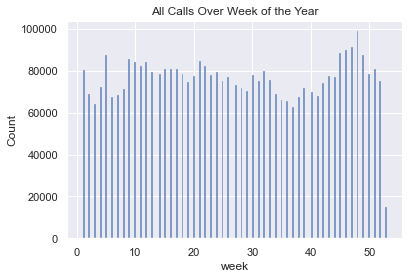

In [11]:
ax = sns.histplot(data=df, x='week')
ax.set_title('All Calls Over Week of the Year')

This graph shows a comparison between the number of calls recieved per week of the year. The number of calls looks to be consistent except for week 52 each year. This is likely due to week 52 being the last week of the year. This week would usually contain or be between two holidays which may account for the lower amount of calls.

C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


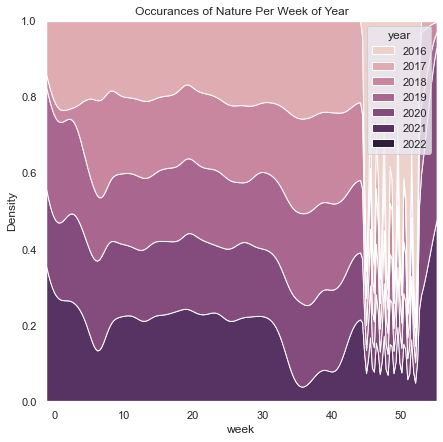

In [12]:
plt.figure(figsize=(7,7))
ax = plt.axes()
sns.kdeplot(x=df[df['year'] != 2022]['week'], hue=df['year'], common_norm=False, multiple="fill", alpha=1, ax=ax)
plt.title("Occurances of Nature Per Week of Year")
plt.show()

## TODO: Explain this graph

## Exploring Graphs of Weapon Crime
A filtered dataframe must be created containing only the entries for weapon crime to do this. Extra categorical values must be removed when filtering down a categorical feature with many values (such as nature). This can be done by redefining the type as a category.

In [13]:
weapon_crime_df = df[df['weapon_crime']].copy(deep=True)
weapon_crime_df['nature'] = weapon_crime_df['nature'].astype('object').astype('category')
weapon_crime_df['nature'].dtype

CategoricalDtype(categories=['RECK USE OF WEAP', 'SHOOTING', 'SHOTS FIRED',
                  'SHOTS FIRED-DV', 'SHOTSPOTTER', 'SUBJ W/GUN', 'SUBJ W/WEAP',
                  'SUBJ W/WEAPON-DV', 'SUBJ WITH GUN', 'SUBJ WITH GUN-DV',
                  'SUBJ WITH WEAPON'],
, ordered=False)

In [14]:
# sns.histplot(data=weapon_crime_df, x="year", hue="nature", legend=True)
# plt.title("Occurances of Weapon Crimes Per Year")
# plt.show()

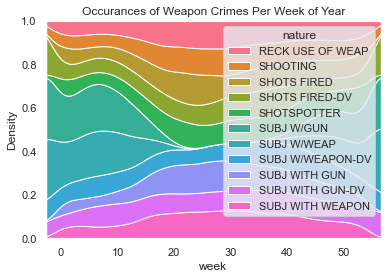

In [15]:
sns.kdeplot(x=weapon_crime_df["week"], hue=weapon_crime_df["nature"], common_norm=False, multiple="fill", alpha=1)
plt.title("Occurances of Weapon Crimes Per Week of Year")
plt.show()

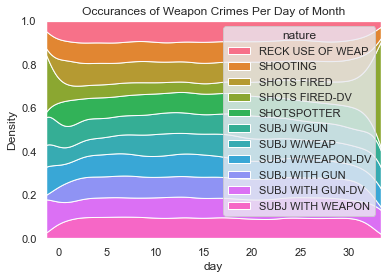

In [16]:
sns.kdeplot(x=weapon_crime_df["day"], hue=weapon_crime_df["nature"], common_norm=False, multiple="fill", alpha=1)
plt.title("Occurances of Weapon Crimes Per Day of Month")
plt.show()

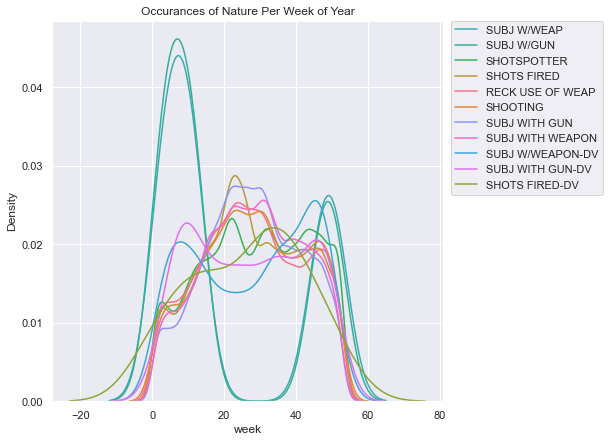

In [17]:
plt.figure(figsize=(7,7))
ax = plt.axes()
for use in weapon_crime_df['nature'].unique():
    sns.kdeplot(x=weapon_crime_df["week"], hue=weapon_crime_df[weapon_crime_df == use]["nature"], 
    ax=ax, common_norm=False, multiple="layer", alpha=1, label=use)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Occurances of Nature Per Week of Year")
plt.show()

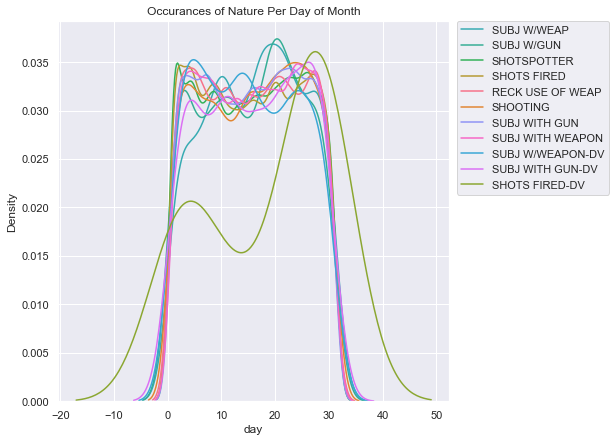

In [18]:
# https://www.statology.org/seaborn-legend-outside/ for moving the legend outside
# https://stackoverflow.com/a/60679315 for plotting multiple categories (fix legend not showing)
uses = weapon_crime_df['nature'].unique()
plt.figure(figsize=(7,7))
ax = plt.axes()
for use in uses:
    sns.kdeplot(x=weapon_crime_df["day"], hue=weapon_crime_df[weapon_crime_df['nature']==use]["nature"], 
    ax=ax, common_norm=False, multiple="layer", alpha=1, label=use)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Occurances of Nature Per Day of Month")
plt.show()

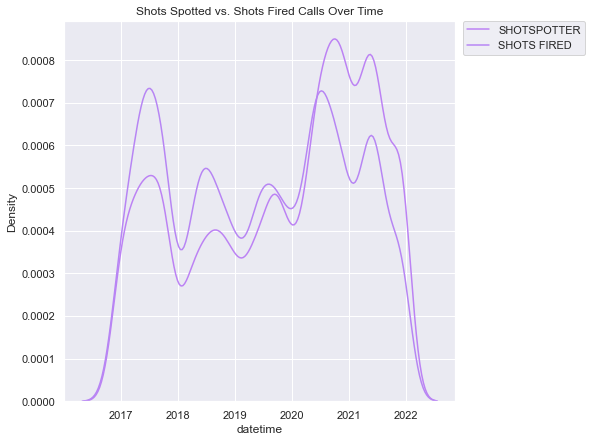

# Statistical Tests
This section is used to perform statistical tests. These tests will seek to answer the research questions mentioned at the top of this notebook. 

There are a few possible statistical tests this section may use.
- The [Kolmogorov-Smirnov test](http://www.mit.edu/~6.s085/notes/lecture5.pdf)
    - Used to test if two arbitrary distributions are the same
- The [two sample t-test](https://www.jmp.com/en_us/statistics-knowledge-portal/t-test/two-sample-t-test.html)
    - Used to test if means of two distributions are the same
- The [Kruskal-Wallis test](https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance)
    - Used to determine if two samples come from the same distribution

The Kolmogorov-Smirnov test will be used in favor of the Kruskal-Wallis and two sample t-tests because [it does not require the data being normally distributed](http://statstutor.ac.uk/resources/steps-glossary/glossary/nonparametric.html#:~:text=The%20Kolmogorov%2DSmirnov%20test%20does,Squared%20Goodness%20of%20Fit%20Test.&text=The%20Kruskal%2DWallis%20test%20is,compare%20three%20or%20more%20samples.&text=It%20is%20the%20analogue%20to,used%20in%20analysis%20of%20variance.).

The two research questions based on the premise of predictions will not be run with statistical tests. Instead they will be tested in a below section about model training. This leaves the four research questions that relate to correlations. They will be repated here: 
- Is there a significant difference between the distribution of shots spotted over time and calls for shots fired?
- Is there a significant difference in the proportion of calls that were unable to be located for shots fired calls compared to shots spotted?
- Does the number of shots spotted and fired correlate with certain dates including holidays and events?
- Does the number of calls correlate with certain weather conditions?

## Shots Spotted vs Shots Fired Over Time
The graph below shows that the distributiosn are not normal. This means that Kruskal-Wallis cannot be used. The first statistical test will use the [Kolmogorov-Smirnov test, from the scipy stats library,](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html) to determine if the number of shots spotted and shots called are simmilar. The [two sample version](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html#scipy.stats.ks_2samp) of the test will be used. The 'two sided' mode will be used for this test. This defines the null hypothesis to be that the two distributions are identical and the alternative to be that they are not identical.

In [ ]:
# plot of shots spotted vs shots fired over time
uses = df[df['nature'].isin(['SHOTSPOTTER', 'SHOTS FIRED'])]['nature'].unique()
plt.figure(figsize=(7,7))
ax = plt.axes()
for use in uses:
    sns.kdeplot(x=df["datetime"], hue=df[df['nature']==use]["nature"], 
    ax=ax, common_norm=False, multiple="layer", alpha=1, label=use)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Shots Spotted vs. Shots Fired Calls Over Time")
plt.show()

In [28]:
ks_2samp(df[df['nature'] == 'SHOTSPOTTER']['datetime'], df[df['nature'] == 'SHOTS FIRED']['datetime'], alternative='two-sided')

KstestResult(statistic=0.12066189556811835, pvalue=0.0)

## Unable to be Located for Shots Spotted vs Shots Fired
Is there a significant difference in the proportion of calls that were unable to be located for shots fired calls compared to shots spotted?
probably need chi2

In [36]:
# Create a temporary dataframe of shots fired vs shots spotted
temp = df[df['nature'].isin(['SHOTSPOTTER', 'SHOTS FIRED'])][['nature', 'status']].copy(deep=True)
# Add a column denoting if the call was unable to be located
temp['notLocated'] = temp['status']=='Unable to Locate Complainant'
print("MPD Data Shape After: %s" % ((temp.shape), ))
temp.head(10).T

MPD Data Shape After: (112712, 3)


,150,151,165,247,346,347,401,406,442,445
nature,SHOTSPOTTER,SHOTSPOTTER,SHOTSPOTTER,SHOTSPOTTER,SHOTS FIRED,SHOTSPOTTER,SHOTS FIRED,SHOTS FIRED,SHOTS FIRED,SHOTSPOTTER
status,Assignment Completed,Assignment Completed,To be Filed,Service in Progress,Service in Progress,Assignment Completed,Unable to Locate Complainant,Service in Progress,Unable to Locate Complainant,Assignment Completed
notLocated,False,False,False,False,False,False,True,False,True,False


<AxesSubplot:xlabel='notLocated', ylabel='nature'>

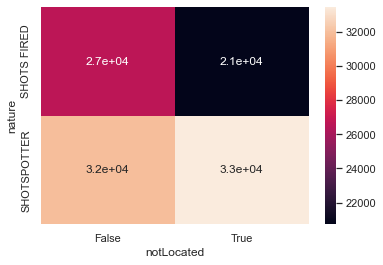

In [39]:
sns.heatmap(data=pd.crosstab(temp['nature'], temp['notLocated']), annot=True)

# Training a Model
## Cluster?
## ???